In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.linalg import expm

In [2]:
graph = [(1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 8), (4, 1), (4, 2),
(5, 1), (5, 7), (5, 8), (6, 2), (6, 3), (6, 7), (6, 8), (7, 1), (7, 3), (7, 4), (8, 3), (8, 5), (8, 6)]

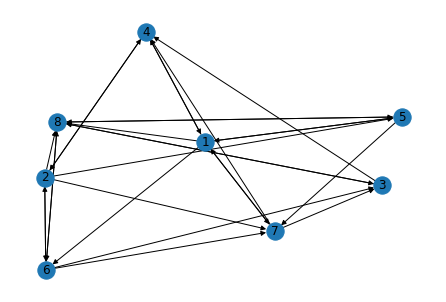

In [3]:
DG = nx.DiGraph()
DG.add_edges_from(graph)
nx.set_edge_attributes(DG, values = 0.015, name = 'weight')
nx.draw(DG, with_labels = True)
plt.show()

In [4]:
print(nx.adjacency_matrix(DG).todense())

[[0.    0.015 0.015 0.015 0.015 0.015 0.    0.   ]
 [0.015 0.    0.    0.    0.    0.    0.015 0.   ]
 [0.015 0.    0.    0.    0.015 0.015 0.    0.   ]
 [0.    0.    0.    0.    0.015 0.015 0.015 0.015]
 [0.015 0.015 0.    0.    0.    0.    0.    0.015]
 [0.    0.    0.015 0.015 0.    0.    0.    0.015]
 [0.    0.015 0.015 0.015 0.015 0.015 0.    0.   ]
 [0.    0.015 0.    0.    0.    0.015 0.    0.   ]]


In [5]:
# adjacency matrix
print(type(nx.adjacency_matrix(DG).todense()))

<class 'numpy.matrix'>


In [6]:
# node order in graph
list(DG.nodes)

[1, 4, 5, 6, 7, 8, 2, 3]

In [7]:
# Part a

In [8]:
def power_of_matrix(A, n):
    return np.linalg.matrix_power(A,n)
def calculate_factorial(n):
    return np.math.factorial(n)

In [9]:
C = []
E = []
node_list = list(DG.nodes)
for i in range(len(node_list)):
    A = nx.adjacency_matrix(DG).todense()
    A_transpose = A.T
    exp_A_T = expm(A_transpose)
    exp_A = expm(A)
    exp_AxAT = np.matmul(exp_A_T, exp_A)
    sigma1 = 0
    sigma2 = 0
    for k in range(len(node_list)):
        # Cause-Centrality
        sigma1 += exp_A_T[k,i]
        # Effect-Centrality
        sigma2 += exp_AxAT[i,k]
    C.append(sigma1)
    E.append(sigma2)

In [10]:
C_data = pd.DataFrame(list(zip(node_list, C)), columns=['node', 'C'])
E_data = pd.DataFrame(list(zip(node_list, E)), columns=['node', 'E'])

In [11]:
# nodes on the ascending order of C
C_data.sort_values('C', axis=0)

,node,C
7,3,1.030573
1,4,1.031142
5,8,1.046029
4,7,1.046030
2,5,1.046256
3,6,1.061484
6,2,1.076717
0,1,1.076717


In [12]:
# nodes on the ascending order of E
E_data.sort_values('E', axis=0)

,node,E
7,3,1.079332
2,5,1.095450
1,4,1.096038
6,2,1.108955
3,6,1.110678
4,7,1.111277
0,1,1.124904
5,8,1.127097


In [13]:
# part b

In [14]:
from itertools import permutations
from itertools import combinations

In [15]:
def calculate_C(DG):
    C = []
    node_list = list(DG.nodes)
    for i in range(len(node_list)):
        A = nx.adjacency_matrix(DG).todense()
        A_transpose = A.T
        exp_A_T = expm(A_transpose)
        sigma1 = 0
        for k in range(len(node_list)):
            # Cause-Centrality
            sigma1 += exp_A_T[k,i]
        C.append(sigma1)
    C_data = pd.DataFrame(list(zip(node_list, C)), columns=['node', 'C'])
    return list(C_data.sort_values('C', axis=0)[0:3]['node'])

 77%|███████▋  | 2959561/3819816 [16:42<00:03, 275101.91it/s]

New Edges =  ((3, 1), (3, 2), (3, 5), (3, 6), (4, 5))


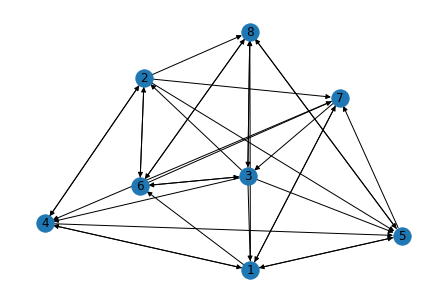

 78%|███████▊  | 2969894/3819816 [16:43<04:47, 2960.52it/s]  


In [16]:
required = [5,4,8]
edge_permutations = list(permutations([1, 2, 3, 4, 5, 6, 7, 8], 2))
new_edges = list(combinations(edge_permutations, 5))
for new_edge in tqdm(new_edges):
    duplicate = 0
    for edge in new_edge:
        if edge in graph:
            duplicate += 1
    if duplicate != 0:
        continue
    new_DG = DG.copy()
    new_DG.add_edges_from(new_edge)
    nx.set_edge_attributes(new_DG, values = 0.015, name = 'weight')
    output = calculate_C(new_DG)
    if output == required:
        print("New Edges = ", new_edge)
        nx.draw(new_DG, with_labels = True)
        plt.show()
        break

In [17]:
# part c

In [18]:
def calculate_C_E(DG):
    C = []
    E = []
    node_list = list(DG.nodes)
    for i in range(len(node_list)):
        A = nx.adjacency_matrix(DG).todense()
        A_transpose = A.T
        exp_A_T = expm(A_transpose)
        exp_A = expm(A)
        exp_AxAT = np.matmul(exp_A_T, exp_A)
        sigma1 = 0
        sigma2 = 0
        for k in range(len(node_list)):
            # Cause-Centrality
            sigma1 += exp_A_T[k,i]
            # Effect-Centrality
            sigma2 += exp_AxAT[i,k]
        C.append(sigma1)
        E.append(sigma2)
    C_data = pd.DataFrame(list(zip(node_list, C)), columns=['node', 'C'])
    E_data = pd.DataFrame(list(zip(node_list, E)), columns=['node', 'E'])
    return [C_data.sort_values('C', axis=0).iloc[0]['node'], E_data.sort_values('E', axis=0).iloc[0]['node']]

 46%|████▌     | 168648/367290 [02:27<02:13, 1492.02it/s]  

New Edges =  ((2, 3), (3, 1), (3, 5), (4, 6))


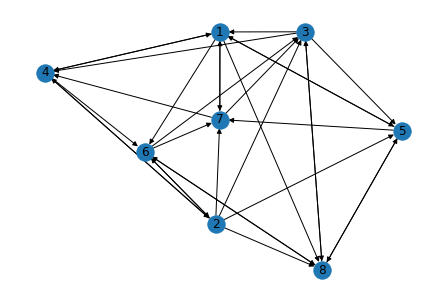

 48%|████▊     | 177531/367290 [02:42<02:53, 1095.82it/s]


In [19]:
required = [5,7]
count = 0
edge_permutations = list(permutations([1, 2, 3, 4, 5, 6, 7, 8], 2))
for links in range(1,6):
    new_edges = list(combinations(edge_permutations, links))
    for new_edge in tqdm(new_edges):
        duplicate = 0
        for edge in new_edge:
            if edge in graph:
                duplicate += 1
        if duplicate != 0:
            continue
        new_DG = DG.copy()
        new_DG.add_edges_from(new_edge)
        nx.set_edge_attributes(new_DG, values = 0.015, name = 'weight')
        output = calculate_C_E(new_DG)
        if output == required:
            print("New Edges = ", new_edge)
            nx.draw(new_DG, with_labels = True)
            plt.show()
            count+=1
            break
    if count == 1:
        break